In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
linearX = pd.read_csv('../data/Q1/linearX.csv', header=None).values 
linearY = pd.read_csv('../data/Q1/linearY.csv', header=None).values 


In [102]:
# Add intercept term to X
X = linearX
Y = linearY
Y = Y.flatten()

In [103]:
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

In [147]:
class LinearRegressor:
    def __init__(self):
        self.theta = None
        self.iterations = 10000
        self.epsilon = 1e-15
    
    def fit(self, X, y, learning_rate=0.01):
        """
        Fit the linear regression model to the data using Gradient Descent.
        
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input data.
            
        y : numpy array of shape (n_samples,)
            The target values.

        learning_rate : float
            The learning rate to use in the update rule.
            
        Returns
        -------
        List of Parameters: numpy array of shape (n_iter, n_features+1,)
            The list of parameters obtained after each iteration of Gradient Descent.
        """
        m, n = X.shape
        X = np.c_[np.ones(m), X] 
        self.theta = np.zeros(n + 1)
        theta_history = []
        theta_history.append(self.theta.copy())
        J_prev = float('inf')
        
        for _ in range(self.iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1 / m) * X.T.dot(errors)
            self.theta -= learning_rate * gradient
            J_curr = compute_cost(X, y, self.theta)
            theta_history.append(self.theta.copy())
            
            if abs(J_prev - J_curr) < self.epsilon:
                break
            J_prev = J_curr
        
        return np.array(theta_history)
    
    def predict(self, X):
        """
        Predict the target values for the input data.
        
        Parameters
        ----------
        X : numpy array of shape (n_samples, n_features)
            The input data.
            
        Returns
        -------
        y_pred : numpy array of shape (n_samples,)
            The predicted target values.
        """
        m = X.shape[0]
        X = np.c_[np.ones(m), X]
        return X.dot(self.theta)

In [148]:
regressor = LinearRegressor()
regressor.fit(X,Y)
theta_history = regressor.fit(X,Y)
print("Learned Parameters (Theta):", regressor.theta)

Learned Parameters (Theta): [ 6.21867795 29.06475485]


In [135]:
print("X shape:", X.shape)  # Should be (n_samples, n_features)
print("Y shape:", Y.shape)  # Should be (n_samples,)
print("List of Parameters shape:", theta_history.shape)  # Should be (n_iter, n_features+1)

X shape: (1000, 1)
Y shape: (1000,)
List of Parameters shape: (1831, 2)


In [136]:
theta_history

array([[ 0.        ,  0.        ],
       [ 0.06218672,  0.29035689],
       [ 0.12375158,  0.57781312],
       ...,
       [ 6.21867795, 29.06475484],
       [ 6.21867795, 29.06475484],
       [ 6.21867795, 29.06475485]])

## 2

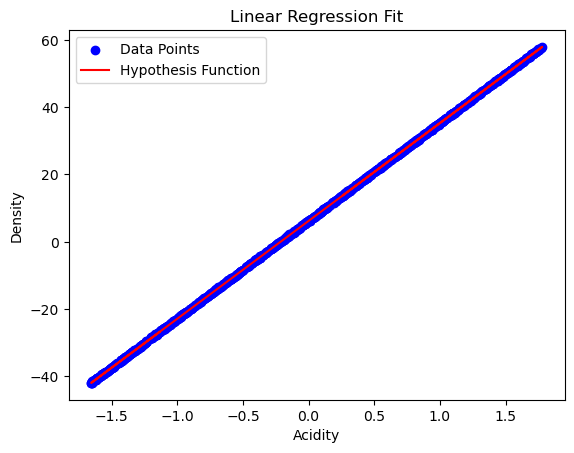

In [144]:
import matplotlib.pyplot as plt

# Predict values for the hypothesis function
X_plot = np.c_[np.ones(X.shape[0]), X]  # Add bias term
Y_pred = X_plot.dot(regressor.theta)

# Plot the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the learned hypothesis (regression line)
plt.plot(X, Y_pred, color='red', label='Hypothesis Function')

# Labels and title
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

In [138]:
m = len(Y)
X_bias = np.c_[np.ones(m), X]

In [139]:
def J(theta):
    m = len(Y)
    predictions = X_bias.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

## 3a

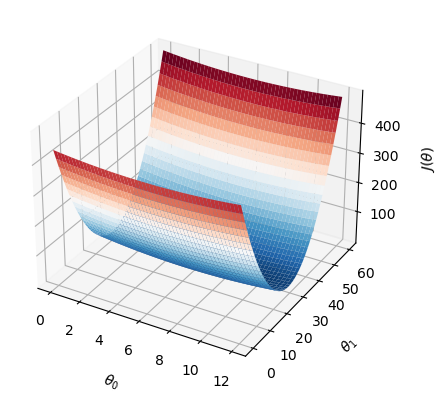

In [196]:
from matplotlib import cm
T0, T1 = np.mgrid[0:12:500j, 0:60:500j]
mesh = np.c_[T0.flatten(), T1.flatten()]

# Compute J_values for the grid
J_values = (
    np.array([J(point) for point in mesh])
    .reshape(500, 500)
)

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0, T1, J_values, cmap=cm.RdBu_r)
ax.set_xlabel(r'$\theta_0$', labelpad=10)
ax.set_ylabel(r'$\theta_1$', labelpad=10)
ax.set_zlabel(r'$J(\theta)$', labelpad=10)

plt.show()

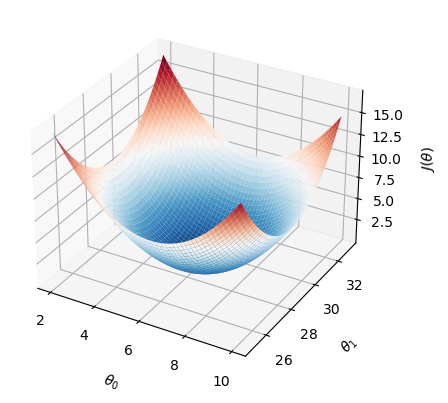

In [153]:
from matplotlib import cm
T0, T1 = np.mgrid[2:10:500j, 25:33:500j]
mesh = np.c_[T0.flatten(), T1.flatten()]

# Compute J_values for the grid
J_values = (
    np.array([J(point) for point in mesh])
    .reshape(500, 500)
)

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0, T1, J_values, cmap=cm.RdBu_r)
ax.set_xlabel(r'$\theta_0$', labelpad=10)
ax.set_ylabel(r'$\theta_1$', labelpad=10)
ax.set_zlabel(r'$J(\theta)$', labelpad=10)

plt.show()

## 3b

[4.41298435e+02 4.32525049e+02 4.23926087e+02 ... 4.87494528e-03
 4.87494528e-03 4.87494528e-03]


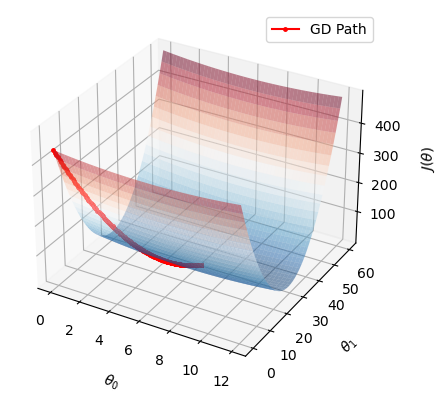

In [195]:
from matplotlib import cm
T0, T1 = np.mgrid[0:12:500j, 0:60:500j]
mesh = np.c_[T0.flatten(), T1.flatten()]

# Compute J_values for the grid
J_values = np.array([J(point) for point in mesh]).reshape(500, 500)

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0, T1, J_values, cmap=cm.RdBu_r, alpha = 0.5)
ax.set_xlabel(r'$\theta_0$', labelpad=10)
ax.set_ylabel(r'$\theta_1$', labelpad=10)
ax.set_zlabel(r'$J(\theta)$', labelpad=10)

# Extract values for the gradient descent path
theta_0_vals = theta_history[:, 0]
theta_1_vals = theta_history[:, 1]
J_vals = np.array([J(theta) for theta in theta_history])
print(J_vals)

# Plot gradient descent path
# ax.scatter(theta_0_vals, theta_1_vals, J_vals, color='black', s=0.2, label='GD Steps')
ax.plot(theta_0_vals, theta_1_vals, J_vals, linestyle='-',
                    color='r', marker='o', markersize=2.5, label='GD Path')

ax.legend()
plt.show()

## 4


In [250]:
def plot_contours(theta_history=None):
    T0, T1 = np.mgrid[0:12:50j, 0:60:50j]
    mesh = np.c_[T0.flatten(), T1.flatten()]

    J_values = (
        np.array([J(point) for point in mesh])
        .reshape(T0.shape)
    )

    plt.ion()
    plt.contour(T0, T1, J_values,30, colors="k")
    plt.xlabel(r'$\theta_0$', labelpad=10)
    plt.ylabel(r'$\theta_1$', labelpad=10)



    if theta_history is not None:
        for theta in theta_history:
            plt.plot([theta[0]], [theta[1]], linestyle='-',
                     color='r', marker='o', markersize=2.5)

    # plt.show()
    return plt

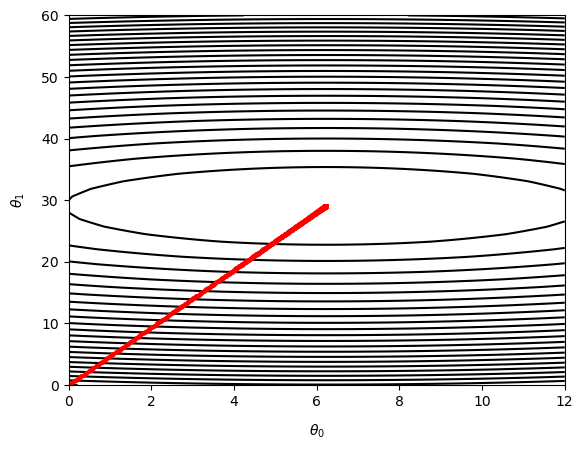

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

In [246]:
plot_contours(theta_history)

## 5


 --- 
 Eta: 0.00 
 --- 



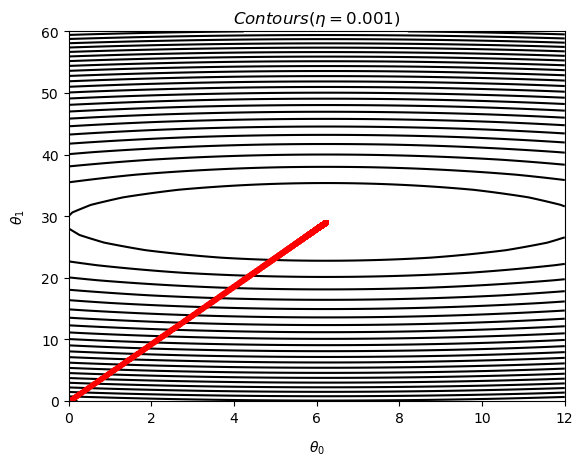


 --- 
 Eta: 0.03 
 --- 



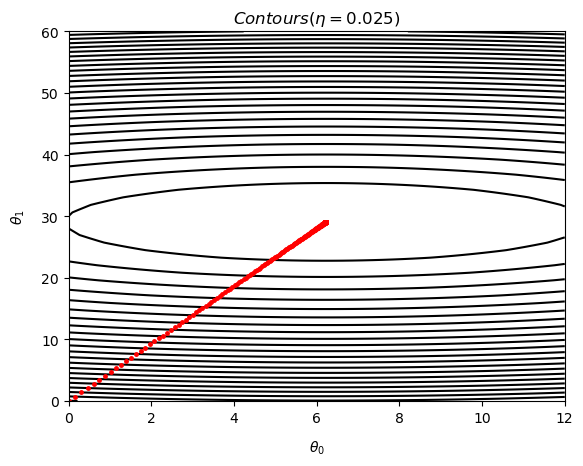


 --- 
 Eta: 0.10 
 --- 



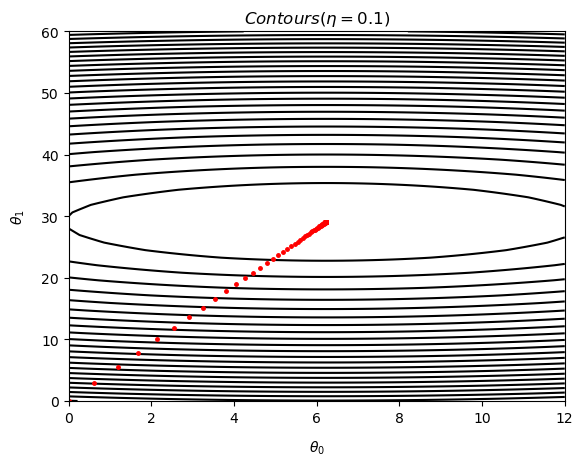

In [252]:
for eta in [0.001, 0.025, 0.1]:
    print("\n --- \n Eta: %.2f \n --- \n" % eta)

    theta_history = regressor.fit(X,Y,eta)

    plt = plot_contours(theta_history)
    plt.title(r"$Contours (\eta=$" + str(eta) + ")")

    plt.show()
    plt.close()